연습문제 9.5.1

In [1]:
N1 = 10
pvalues1 = np.array([sp.stats.binom_test(n, N1) for n in range(N1 + 1)])
fair_range1, = np.where(pvalues1 > 0.1)
fair_start1, fair_end1 = fair_range1[0], fair_range1[-1]
print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때"\
.format(N1, fair_start1, fair_end1))
N2 = 1000
pvalues2 = np.array([sp.stats.binom_test(n, N2) for n in range(N2 + 1)])
fair_range2, = np.where(pvalues2 > 0.1)
fair_start2, fair_end2 = fair_range2[0], fair_range2[-1]
print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때"\
.format(N2, fair_start2, fair_end2))

N=10일 때 공정한 경우: 앞면이 나온 횟수가 2~8일 때
N=1000일 때 공정한 경우: 앞면이 나온 횟수가 474~526일 때


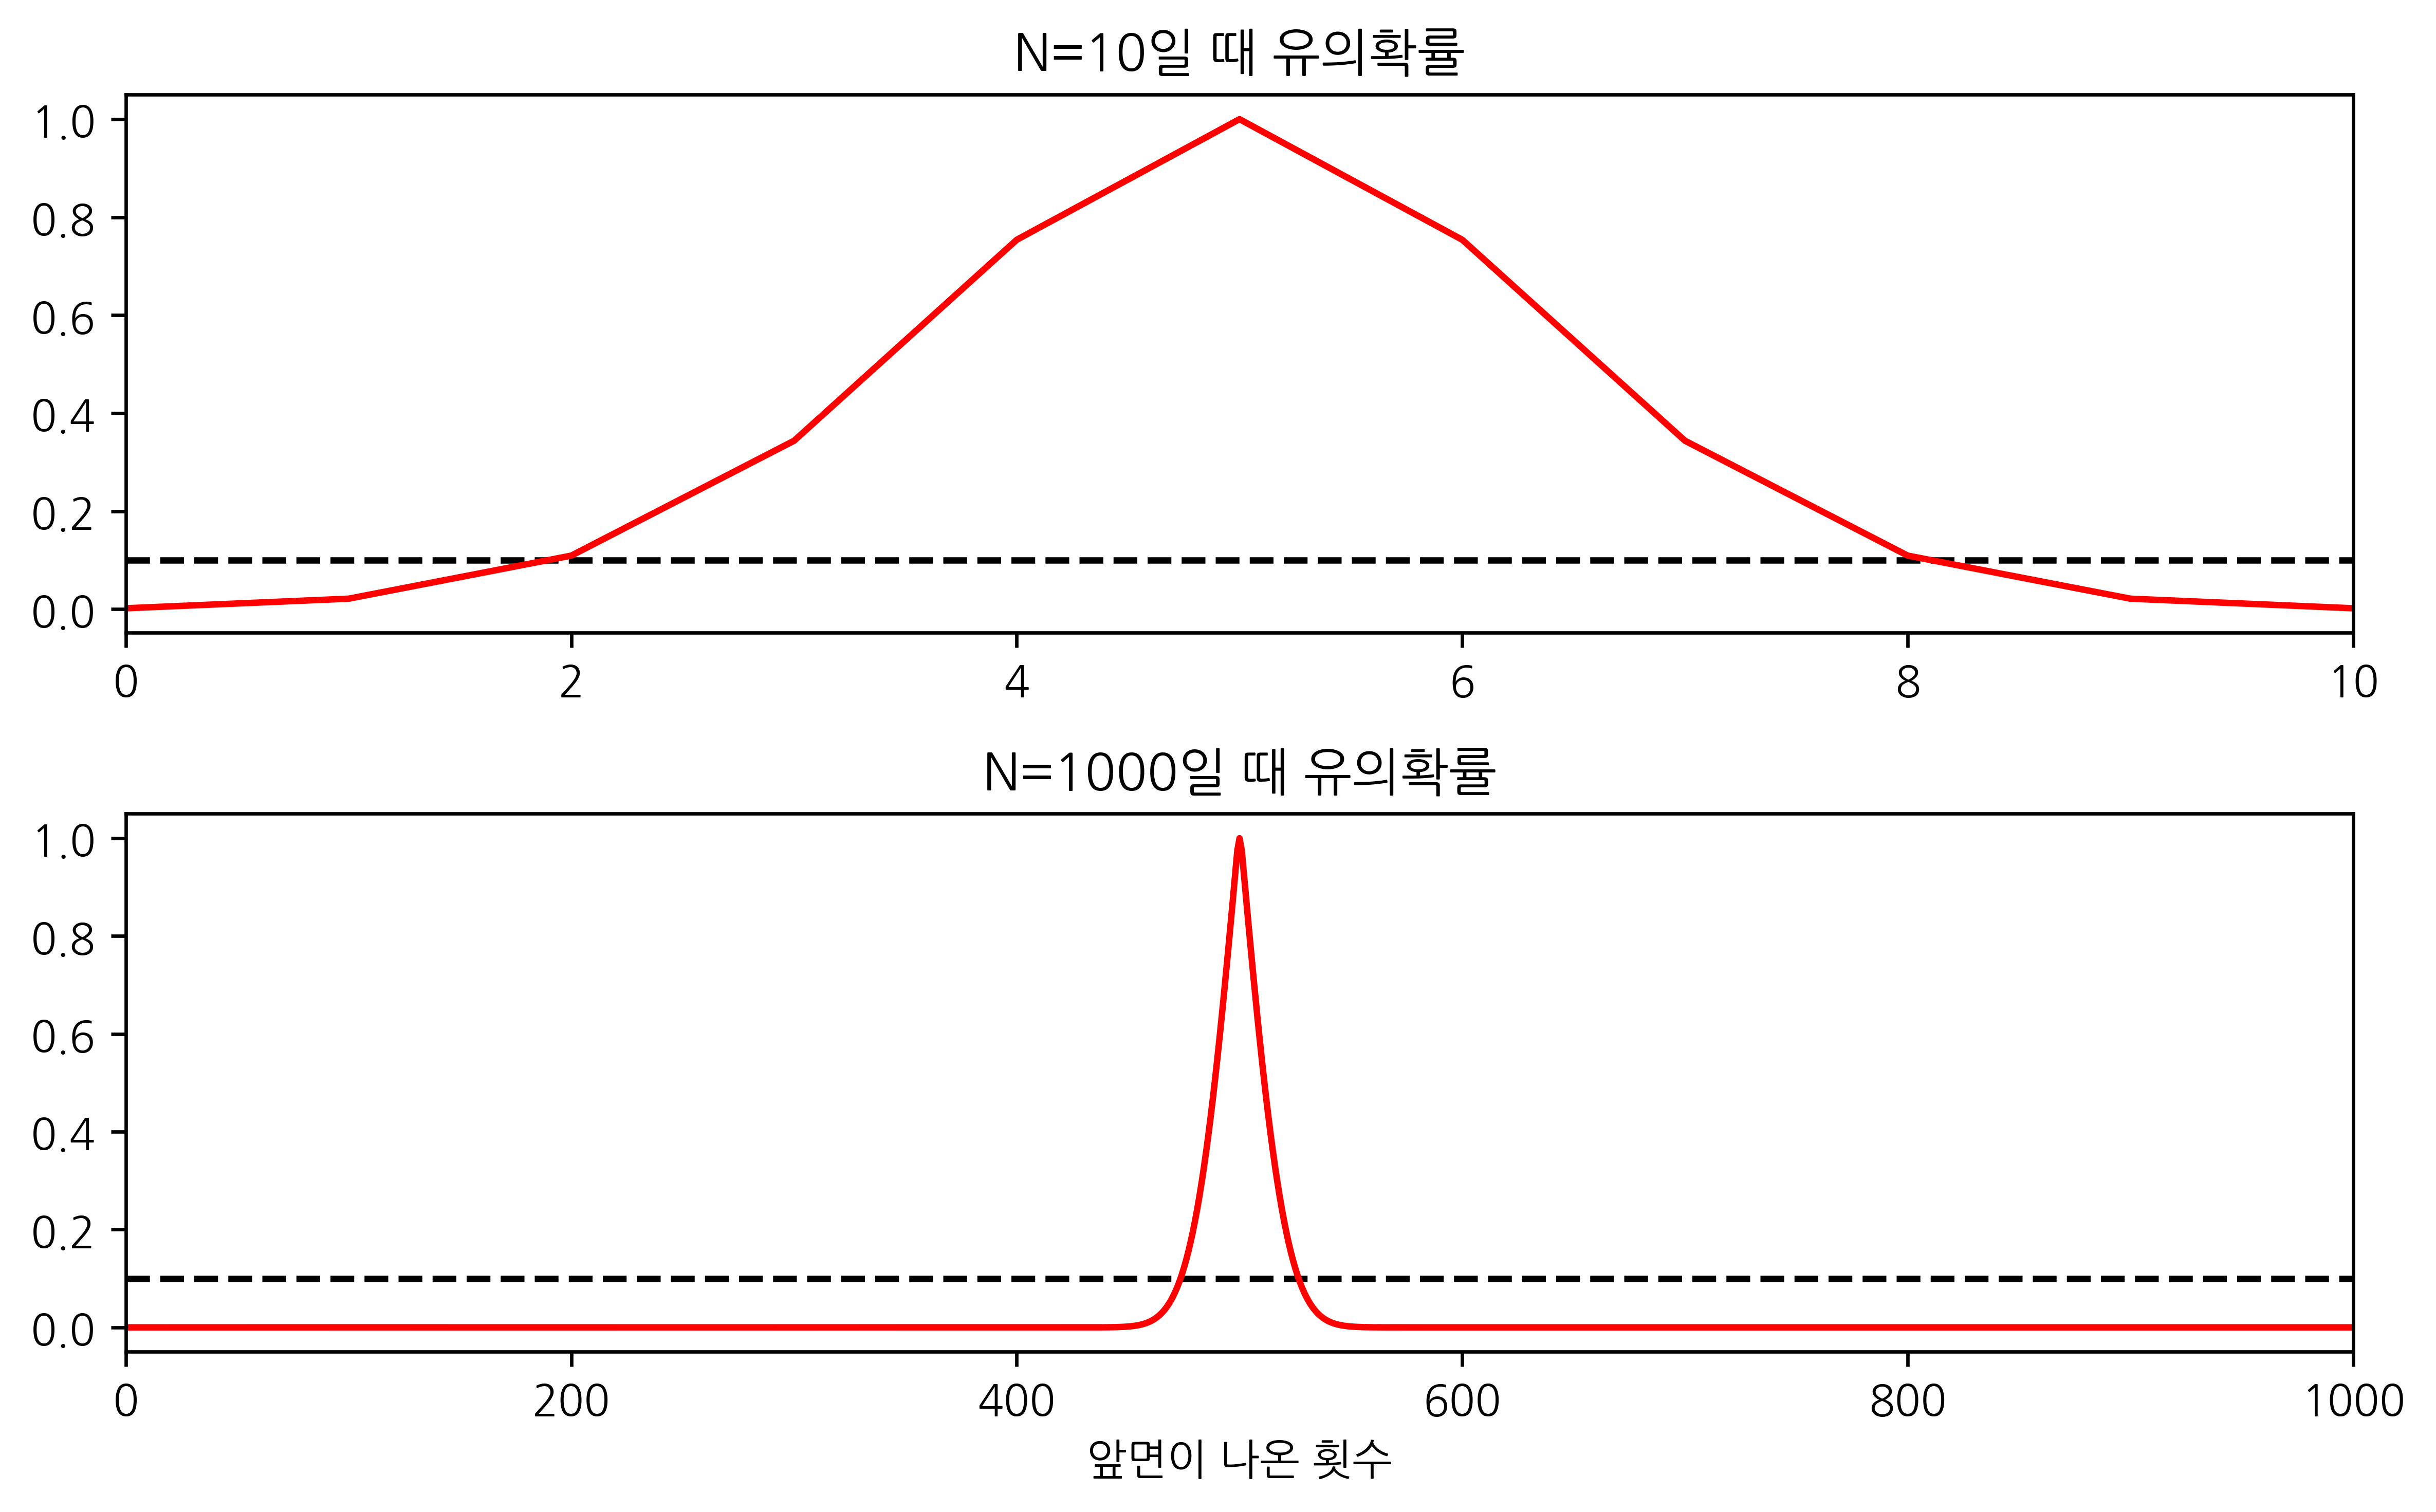

In [2]:
plt.subplot(211)
plt.plot(pvalues1, "r-")
plt.hlines(y=0.1, xmin=0, xmax=N1 + 1, ls="--")
plt.xlim(0, N1)
plt.title("N={}일 때 유의확률".format(N1))
plt.subplot(212)
plt.plot(pvalues2, "r-")
plt.hlines(y=0.1, xmin=0, xmax=N2 + 1, ls="--")
plt.xlim(0, N2)
plt.title("N={}일 때 유의확률".format(N2))
plt.xlabel("앞면이 나온 횟수")
plt.tight_layout()
plt.show()

연습문제 9.5.2

In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
tips[tips.sex == "Female"].smoker.value_counts()

No     54
Yes    33
Name: smoker, dtype: int64

In [5]:
sp.stats.binom_test(54, 54 + 33, alternative="greater")

0.015709055116923068

연습문제 9.5.3

연습문제 9.5.4

In [6]:
n = np.array([0, 0, 0, 0, 0, 5])
sp.stats.chisquare(n)

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

연습문제 9.5.5

In [9]:
obs = np.array([[4, 16, 20], [23, 18, 19]])
sp.stats.chi2_contingency(obs)

(9.910060890453046, 0.00704786570249751, 2, array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

In [10]:
obs = np.array([[4, 23], [16, 18], [20, 19]])
sp.stats.chi2_contingency(obs)

(9.910060890453048, 0.007047865702497504, 2, array([[10.8, 16.2],
        [13.6, 20.4],
        [15.6, 23.4]]))

연습문제 9.5.6

In [13]:
x1 = [80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80]
x2 = [80, 85, 70, 80, 35, 55, 80]
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

연습문제 10.1.1

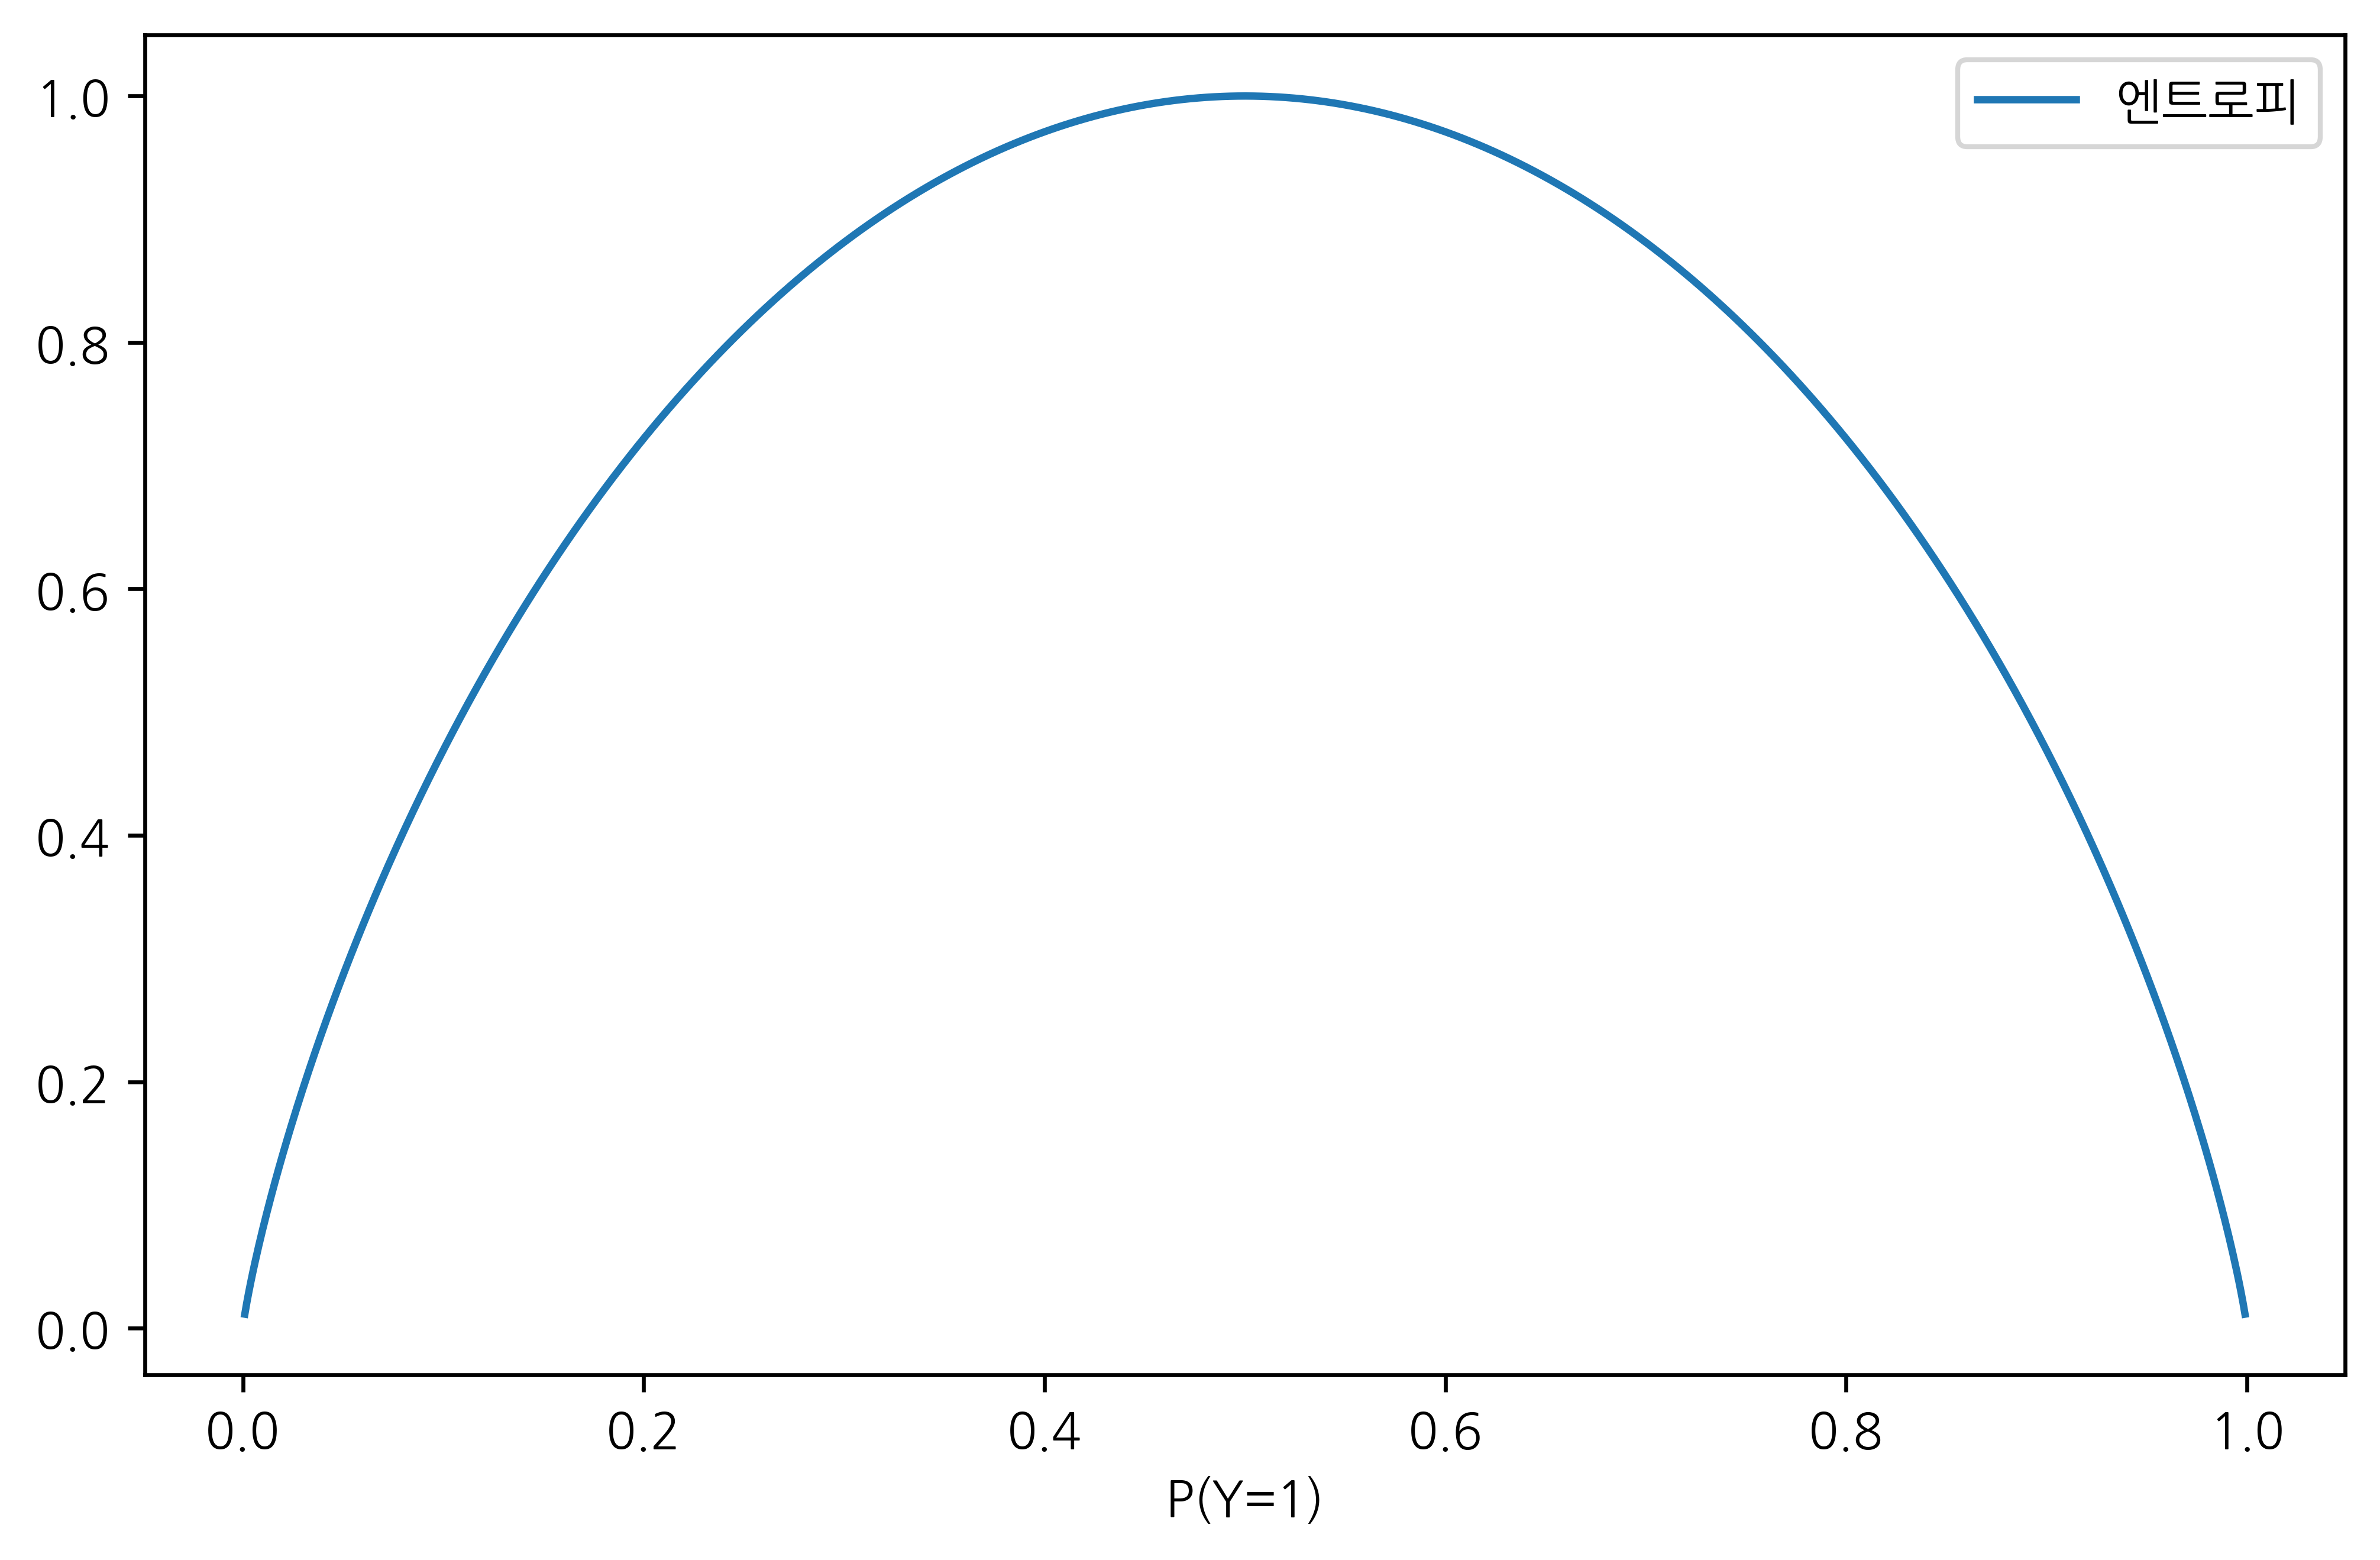

In [17]:
P0= np.linspace(0.001, 1 - 0.001, 1000)
P1 = 1 - P0
H = -P0 * np.log2(P0) - P1 * np.log2(P1)

plt.plot(P1, H, "-", label="엔트로피")
plt.legend()
plt.xlabel("P(Y=1)")
plt.show()

연습문제 10.1.3

In [18]:
p = [1/3, 2/3]
sp.stats.entropy(p, base=2)

0.9182958340544894

In [19]:
p = [3/4, 1/4]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [20]:
p = [1, 0]
sp.stats.entropy(p, base=2)

0.0

연습문제 10.2.1

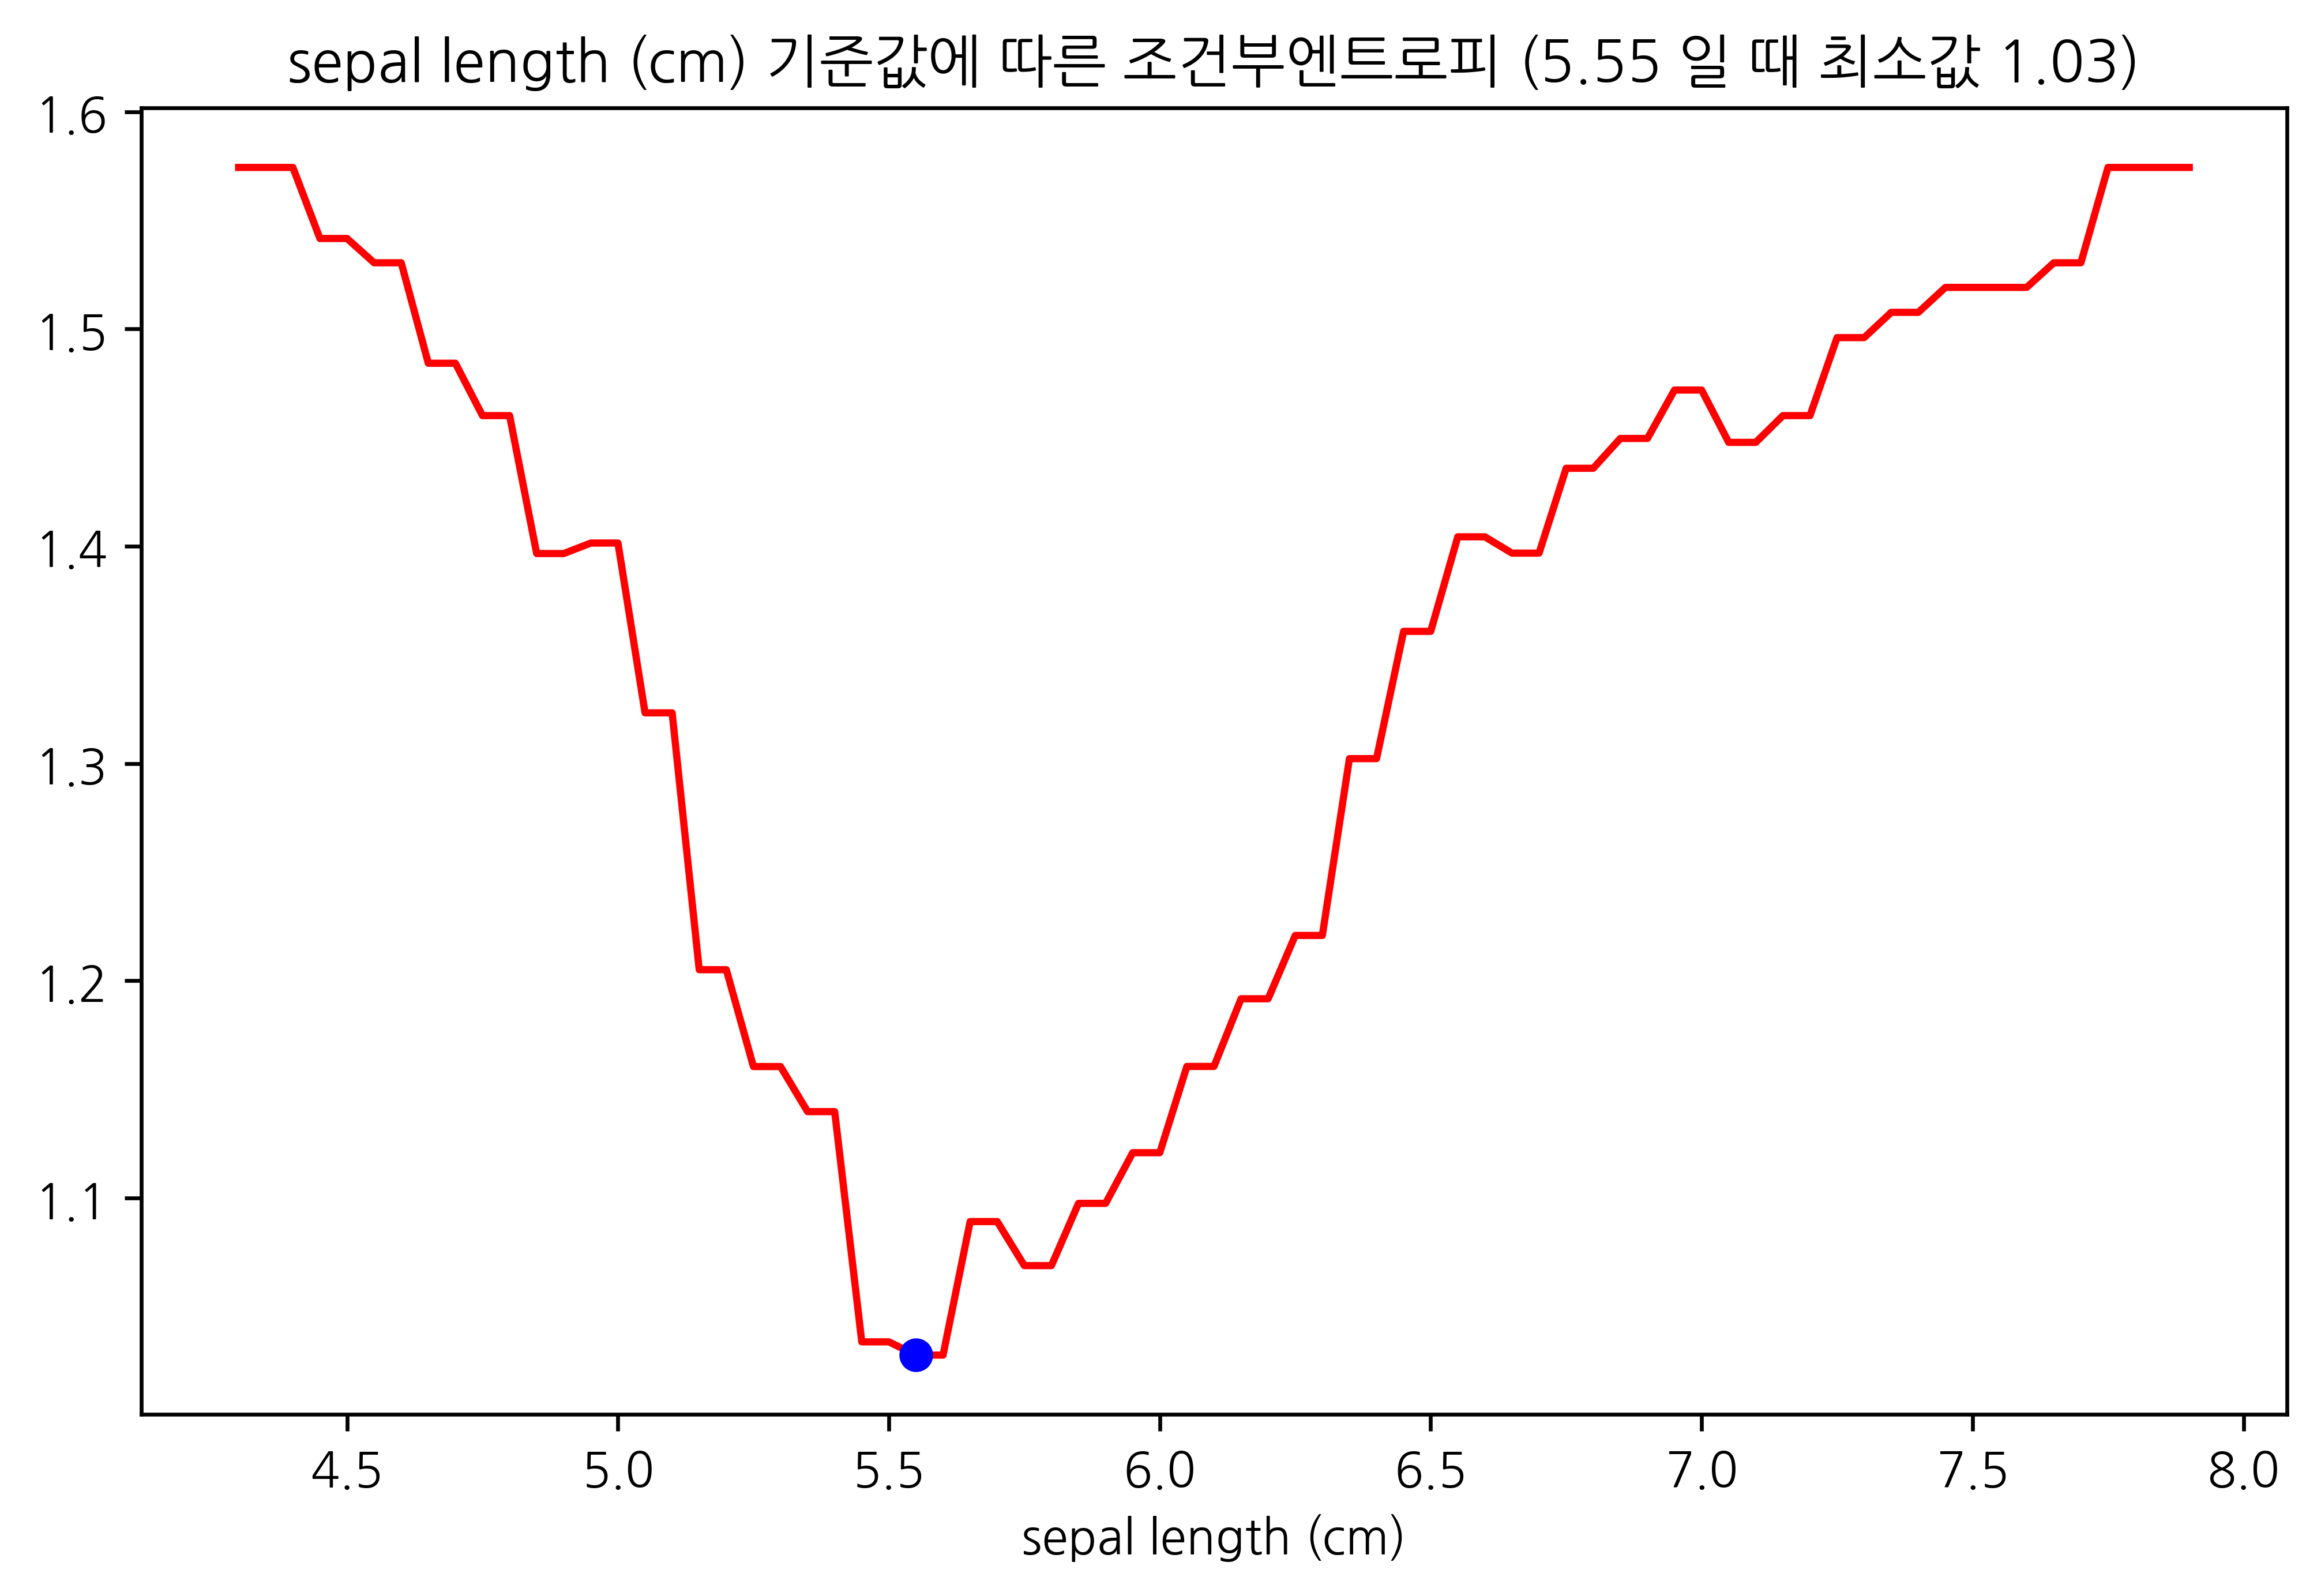

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target

def calc_cond_entropies(col, threshold):
    df["X1"] = df[col] > threshold
    pivot_table1 = \
        df.groupby(["X1", "species"]).size().unstack().fillna(0)
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    
    cond_entropies = []
    for th in th_range:
        cond_entropies.append(
            calc_cond_entropies(col, th))
    id_min = np.argmin(cond_entropies)
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies)
    plt.plot(th_range, cond_entropies, "r-")
    plt.plot(th_min, ce_min, "bo")
    title = "{} 기준값에 따른 조건부엔트로피 ({:.3} 일 때 최소값 {:.3})"\
        .format(col, th_min, ce_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()
    
plot_min_cond_entropy("sepal length (cm)")